# Codigo Final Evidencia 3. Solución del Reto (Grupal)

| Integrantes        | Matricula            |
|---------------|---------------|
| Ana Lucía Cárdenas Pérez      | A01284090          |
| Elías Garza Valdés      | A01284041          |
| Diego Elián Rodríguez Cantú      | A00829925          |
| José Edmundo Romo Castillo           | A01197772           |

# Parte 1: Limpieza y procesamiento de datos

En el ámbito del aprendizaje automático y la ciencia de datos, la calidad de los datos es un factor crítico para el éxito de cualquier proyecto. La base de datos del Titanic, disponible en la plataforma Kaggle [https://www.kaggle.com/competitions/titanic/](https://www.kaggle.com/competitions/titanic/), es un recurso ampliamente conocido y utilizado que ofrece una rica fuente de información sobre los pasajeros del famoso naufragio del RMS Titanic. Este conjunto de datos es un escenario ideal para desarrollar habilidades en limpieza, tratamiento y transformación de variables, con el objetivo de preparar los datos de manera efectiva para su uso en modelos de machine learning clasificadores.

Esta primera parte del informe se centra en el proceso de preparación de datos aplicado a la base de datos del Titanic. Exploraremos las etapas clave de la limpieza de datos, el tratamiento de valores faltantes y atípicos, así como la transformación de variables para garantizar que los datos estén listos para alimentar modelos de clasificación. Además, analizaremos las características relevantes de este conjunto de datos, que incluyen información sobre los pasajeros, como su edad, género, clase de cabina y si sobrevivieron o no al naufragio.

La base de datos del Titanic es ampliamente utilizada en la comunidad de ciencia de datos y aprendizaje automático como un punto de partida para proyectos de clasificación y predicción. Su disponibilidad en Kaggle la hace accesible para estudiantes y profesionales por igual, y proporciona una excelente oportunidad para aplicar técnicas de limpieza y preparación de datos en un contexto real.


In [47]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

#Lectura y revisión de datos

train = pd.read_csv("../Data/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


La base de datos contiene la información de los pasajeros del Titanic de 1912, embarcación que terminó siendo hundida por su colisión con un iceberg. En la base se tienen diversos datos entre ellos la clasificación de si este viajero sobrevivió al accidente o falleció. Entre las demás variables disponibles se encuentran:

1. **PassengerId** [int]: Es un identificador único asignado a cada pasajero.

2. **Survived** [bool]: Indica si el pasajero sobrevivió o no al naufragio. Un valor de 0 significa que no sobrevivió, y un valor de 1 significa que sí sobrevivió.

3. **Pclass (Passenger Class)** [int]: Representa la clase en la que el pasajero viajaba. Puede tener los valores 1 (primera clase), 2 (segunda clase) o 3 (tercera clase).

4. **Name** [str]: El nombre del pasajero.

5. **Sex** [str]: El género del pasajero, que puede ser 'male' (hombre) o 'female' (mujer).

6. **Age** [float]: La edad del pasajero en años. Algunas edades pueden estar representadas como fracciones si los pasajeros eran bebés.

7. **SibSp (Siblings/Spouses Aboard)** [int]: El número de hermanos o cónyuges que el pasajero tenía a bordo.

8. **Parch (Parents/Children Aboard)** [int]: El número de padres o hijos que el pasajero tenía a bordo.

9. **Ticket** [str]: El número de la boletería del pasajero.

10. **Fare** [float]: El precio del boleto que el pasajero pagó.

11. **Cabin** [str]: El número de cabina en la que el pasajero estaba alojado. Algunos valores pueden estar ausentes debido a la falta de registros.

12. **Embarked** [char]: El puerto donde el pasajero embarcó. Puede tener los valores 'C' (Cherbourg), 'Q' (Queenstown) o 'S' (Southampton).

Cabe mencionar que además de estas columnas principales, puede haber otras columnas secundarias en la base de datos con información adicional, pero estas son las principales que se utilizan comúnmente en análisis y modelado predictivo.

## Limpieza y transformación de las variables

Para la exploración inicial se revisará los tipos de datos y sus valores faltantes.

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


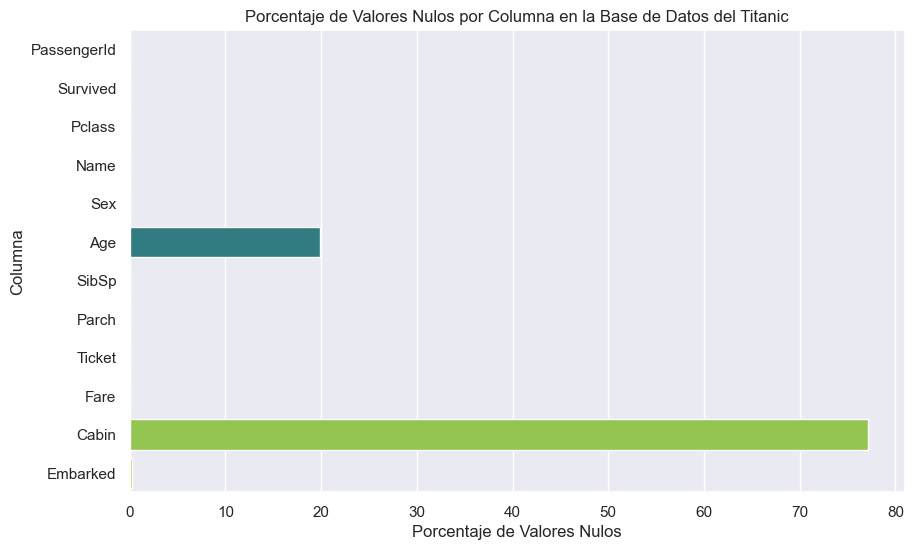

In [49]:
null_percentages = (train.isnull().sum() / len(train)) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=null_percentages.values, y=null_percentages.index, palette='viridis')
plt.xlabel('Porcentaje de Valores Nulos')
plt.ylabel('Columna')
plt.title('Porcentaje de Valores Nulos por Columna en la Base de Datos del Titanic')
plt.show()

Quitando las columnas de `Cabin`, `Passenger Id`, `Ticket`, `Name`. Esto por las razones siguientes:


**Passenger Id**: Este es un número que no solo explica el orden en el que estan las personas y no guarda ninguna relación con la supervivencia. 

**Cabin**: Hay una cantidad considerable de datos nulos por lo que no vamos a usar esta columna. Es posible que en un futuro se pruebe tranformar la columna a binario separando a todos los que tienen cabina y los que no pero eso sera ya viendo las pruebas de los modelos. 

**Name**: En principio, el nombre no hace que tu supervivencia suba o baje. Sin embargo quisieramos dejar la posibilidad de agrupar a las personas por apellido ya que es probable que las familias se muevan juntas asi que su supervivencia puede estar agrupada. Sin embargo, esto se hara en un futuro si se considera necesario. 

**Ticket**: Sucede algo similar que con el nombre. En un principio no deberia afectar la supervivencia pero las personas que compraron boletos consecutivos es probable que sean conocidos o amigos por lo que podrían ir juntos en el barco al momento de evacuar. 

In [50]:
train = train.drop(columns = ['Cabin', 'PassengerId', 'Ticket', 'Name'])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Transformación de datos

Podemos quitar algunos outliers. Sin embargo, si vemos los diagramas de caja podemos observar que los valores atipicos importantes estan en edad y costo del boleto y no consideramos que estos sean valores verdaderamente atipicos. En el caso de la edad es muy posible que haya pesonas mayores que haya que considerar y tambien eliminar a el grupo de personas que pago considerablemente más esta mal ya que justo son un grupo importante a considerar. De hecho pueden ser atipicos porque son menos la cantidad de personas de clase alta pero es importante para la supervicencia este factor. 

<Axes: >

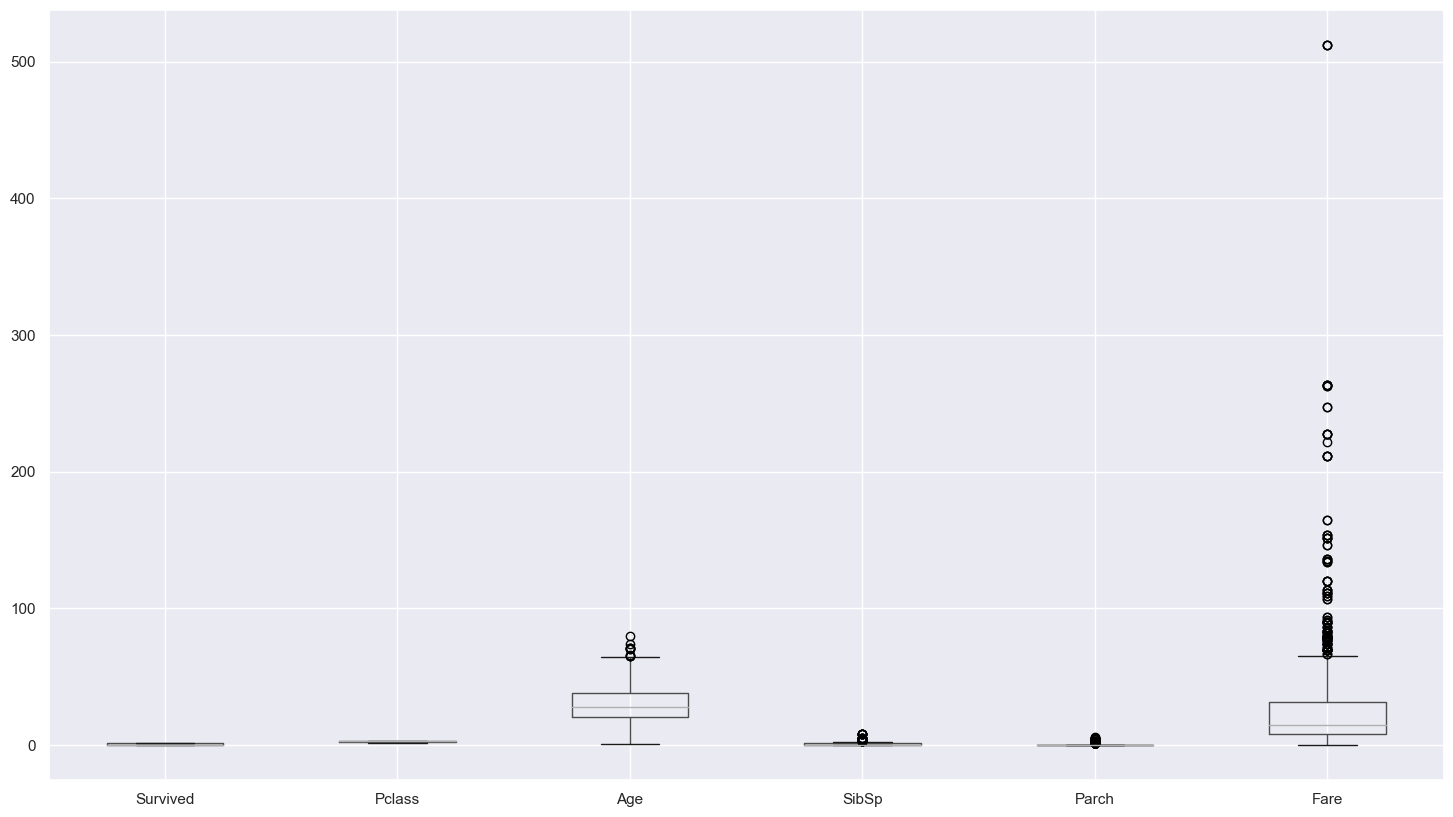

In [52]:
train.boxplot(figsize=(18,10))

En cualquier caso, si se quiere quitar estos valores con esta función se puede hacer sin problema.

In [53]:
def remove_outliers(df : pd.DataFrame(), rango : float, columna :  str):
    # Select only numeric columns
    df_c = df[[columna]]
    numeric_cols = df_c.select_dtypes(include=['number'])

    # Calculate Q1, Q3, and IQR for numeric columns
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1

    # Apply the filter only to numeric columns
    mask = ~((numeric_cols < (Q1 - rango * IQR)) | (numeric_cols > (Q3 + rango * IQR))).any(axis=1)

    # Create a new DataFrame using the filter condition
    return df[mask]


Es de interés remover los registros que tienen un valor de `Fare` muy por arriba de la media. En la gráfica podemos notar como hay unos registros puntuales incluso por encima de 500 los cuales se consideran podría afectar en los cálculos de las medias y generar más ruido en los modelos que ayudar.

In [54]:
train[train['Fare']== train['Fare'].max()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


Son 3 registros con el valor de `Fare` que se desea remover.

<Axes: >

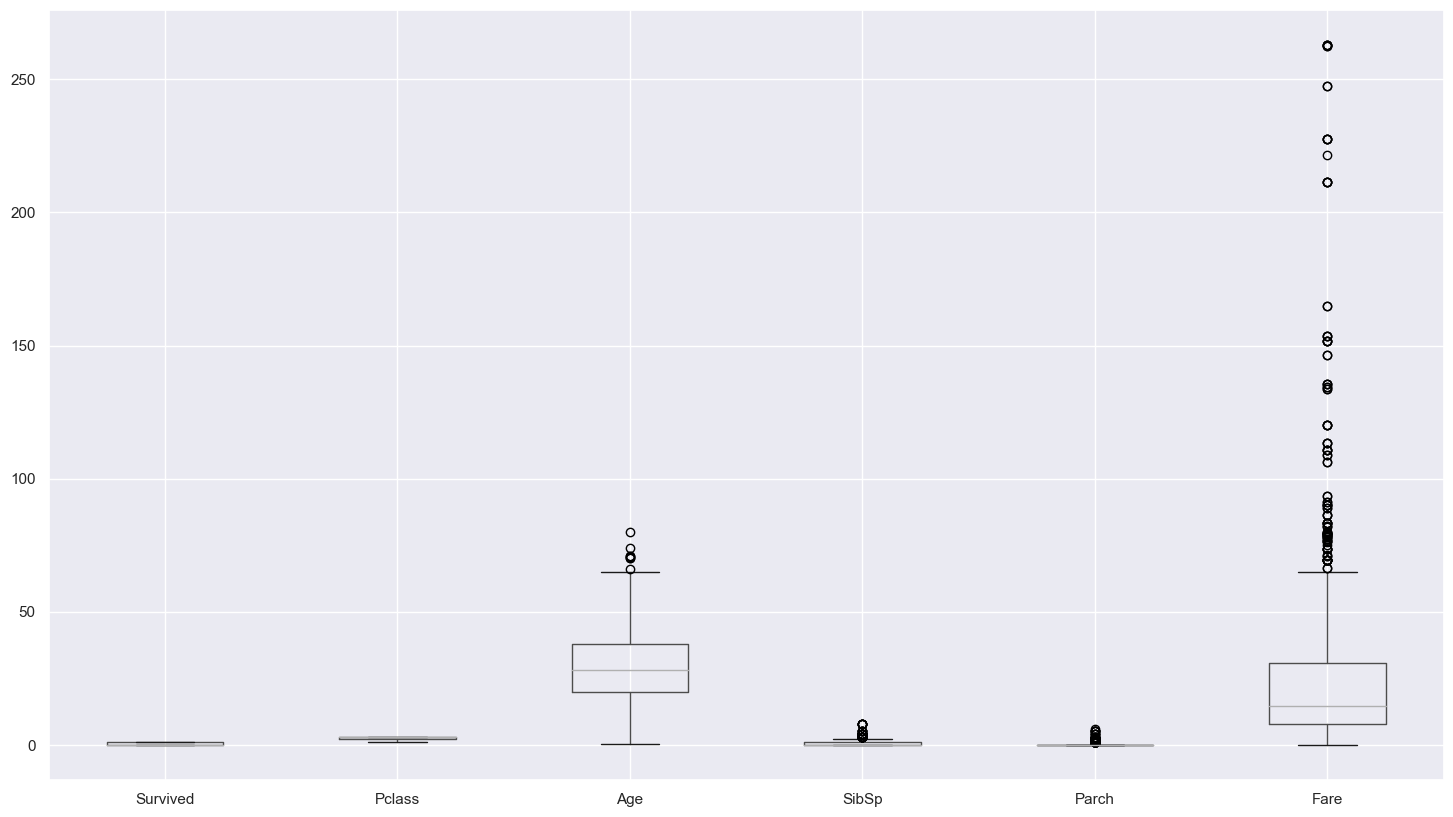

In [55]:
train = remove_outliers(train, 13, 'Fare')
train.boxplot(figsize=(18,10))

Tenemos algunos datos faltantes en la variable de edad y la variable de Embarked. No queremos perder esos datos por lo que en el caso de la variable edad la rellenaremos con el promedio de la columna usando un k-nearest-neighbors para rellenar con el promedio de grupos similaresñ.

Por parte de la variable de Embarked usaremos la moda, aunque también se podría usar el método de KNN mencionado.

In [56]:
from sklearn.impute import KNNImputer

def fill_na_knn(df : pd.DataFrame(), columna : str, neighbors : int):

    knn_imputer = KNNImputer(n_neighbors = neighbors)
    idx = list(df.columns).index(columna)
    c = knn_imputer.fit_transform(df)
    df[columna] =  c[:,idx]
    return train

In [57]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
print(train.info())
display(train)

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  888 non-null    int64  
 1   Pclass    888 non-null    int64  
 2   Sex       888 non-null    object 
 3   Age       711 non-null    float64
 4   SibSp     888 non-null    int64  
 5   Parch     888 non-null    int64  
 6   Fare      888 non-null    float64
 7   Embarked  888 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.4+ KB
None


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Los modelos que vamos a utilizar necesitan valores numericos por lo que vamos a codificar las variables categóricas. En este caso utilizaremos un One-Hot encoding para generar las columnas necesarias para las variables `Embarked` y `Sex`. 

In [58]:
train = pd.get_dummies(train, columns=['Embarked'])
train['is_male'] = pd.get_dummies(train['Sex'])['male']
train = train.drop(columns='Sex')
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,is_male
0,0,3,22.0,1,0,7.2500,False,False,True,True
1,1,1,38.0,1,0,71.2833,True,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True,False
3,1,1,35.0,1,0,53.1000,False,False,True,False
4,0,3,35.0,0,0,8.0500,False,False,True,True


In [59]:
#ahora que son solamente valores numéricos podemos aplicar el knn
train = fill_na_knn(train, 'Age', 3)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    888 non-null    int64  
 1   Pclass      888 non-null    int64  
 2   Age         888 non-null    float64
 3   SibSp       888 non-null    int64  
 4   Parch       888 non-null    int64  
 5   Fare        888 non-null    float64
 6   Embarked_C  888 non-null    bool   
 7   Embarked_Q  888 non-null    bool   
 8   Embarked_S  888 non-null    bool   
 9   is_male     888 non-null    bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 52.0 KB


Ahora se analizaran la relación de las variables para determinar si conservamos todas o descartamos algunas.

<Axes: >

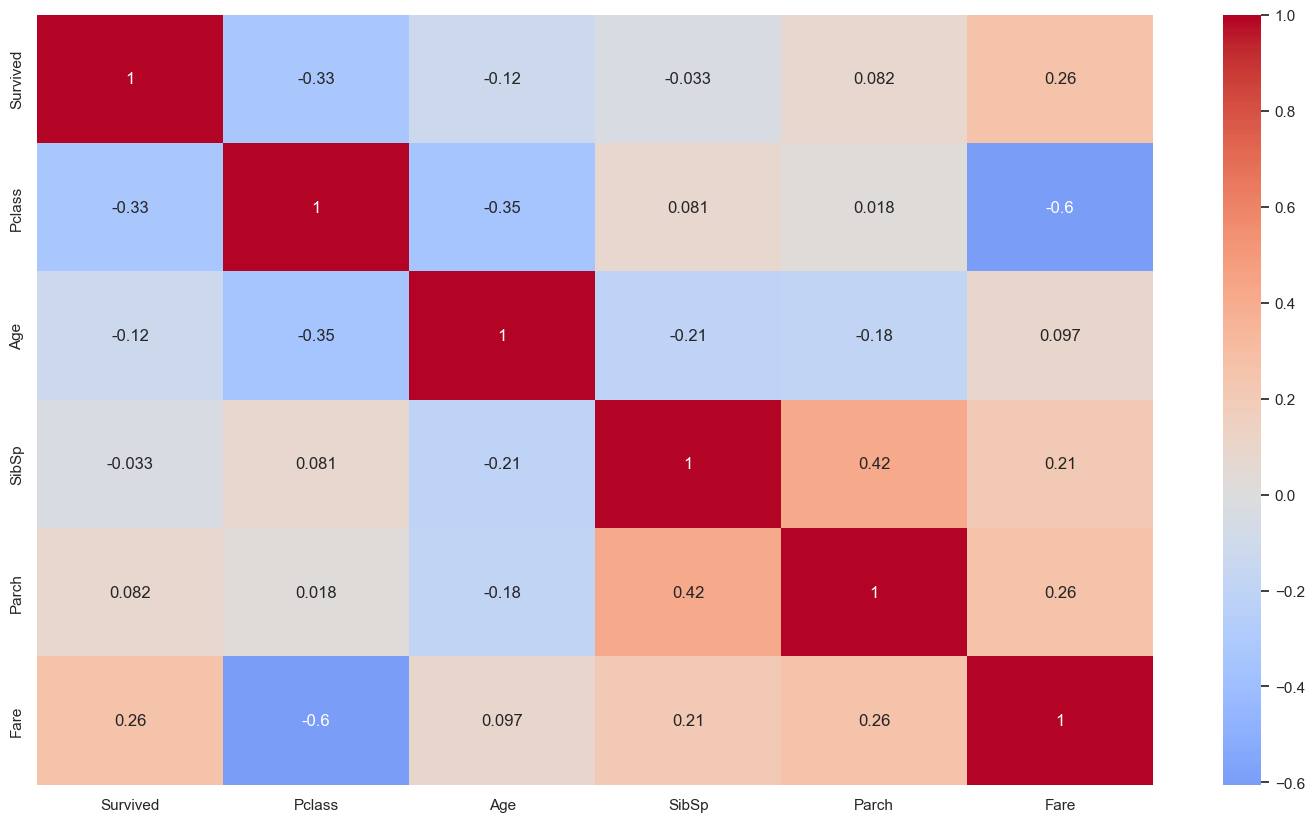

In [60]:
sns.set(rc={'figure.figsize':(18,10)})
correlation_matrix = train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)


Ya que `Pclass` y `Fare` tienen una correlación considerada alta (0.6) se debe elmiminar del data set una de ellas. Por multicolinearidad, se dropeará la columna ded `Fare` ya que tiene menor correlación con la variable objetivo.

In [61]:
train = train.drop(columns = ['Fare'], axis = 1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,is_male
0,0,3,22.0,1,0,False,False,True,True
1,1,1,38.0,1,0,True,False,False,False
2,1,3,26.0,0,0,False,False,True,False
3,1,1,35.0,1,0,False,False,True,False
4,0,3,35.0,0,0,False,False,True,True


Y así se finaliza con un dataset limpio y listo para usarse en los modelos clasificadores. 

# Parte 2 - Reto Selección, configuración y entrenamiento del modelo


## Variables

Las variables que se seleccionaron ("**Survived**", "**Pclass**", "**Age**", "**SibSp**", "**Parch**", "**Embarked_C**", "**Embarked_Q**", "**Embarked_S**", "**is_male**") se eligieron en función de su potencial para influir en la supervivencia de los pasajeros y su capacidad para aportar información significativa al modelo. Las demás variables se eliminan debido a su falta de relevancia o a la dificultad de interpretación. Esta selección cuidadosa de variables contribuye a la creación de un modelo más eficiente y efectivo para predecir la supervivencia de los pasajeros del Titanic.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../Model')
from SVM_titanic import titanic_svm
from GaussianNB import titanic_gnb
from Random_Forest import titanic_rf, titanic_rf_tuned
from logistic import titanic_log
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import random
random.seed(0)


Dado que la base de datos ya está limpia y contiene variables como "Survived", "Pclass", "Age", "SibSp", "Parch", "Embarked_C", "Embarked_Q", "Embarked_S" y "is_male", tenemos un conjunto de datos que combina variables numéricas y categóricas codificadas en formato numérico o binario.

Vamos a analizar cómo estas variables se ajustan a los siguientes modelos de clasificación: Regresión Logística, Random Forest, Support Vector Machine (SVM) y Gaussian Naive Bayes.

1. **Regresión Logística**:
   - **Compatibilidad con datos**: La regresión logística es adecuada para datos que contienen variables numéricas y categóricas. Puede manejar variables binarias (como "is_male") y variables continuas (como "Age").
   - **Ventajas**: Es un modelo simple e interpretable. Ofrece probabilidades de clasificación. Funciona bien cuando las clases son linealmente separables.
   - **Desventajas**: Puede no funcionar bien si las relaciones son altamente no lineales. No captura interacciones complejas entre características.

2. **Random Forest**:
   - **Compatibilidad con datos**: Los Random Forests son versátiles y pueden manejar una combinación de características numéricas y categóricas.
   - **Ventajas**: Pueden manejar relaciones no lineales. Son robustos frente a overfitting. Pueden manejar variables irrelevantes.
   - **Desventajas**: Pueden ser más difíciles de interpretar que modelos simples. Pueden sobreajustar en conjuntos de datos pequeños.

3. **Support Vector Machine (SVM)**:
   - **Compatibilidad con datos**: Los SVM pueden manejar tanto características numéricas como categóricas codificadas.
   - **Ventajas**: Pueden manejar relaciones no lineales utilizando el truco del kernel. Son eficaces en espacios de alta dimensión. Buen rendimiento en problemas con separación clara.
   - **Desventajas**: Puede ser computacionalmente costoso en conjuntos de datos grandes. La selección del kernel y los parámetros puede ser un desafío.

4. **Gaussian Naive Bayes**:
   - **Compatibilidad con datos**: El Naive Bayes es adecuado para características numéricas y categóricas. La asunción de independencia condicional entre características puede ser cuestionable en ciertos casos.
   - **Ventajas**: Simple y rápido. Puede funcionar bien incluso con supuestos incumplidos. Bueno para datos pequeños.
   - **Desventajas**: Supone independencia condicional, lo que puede no ser cierto en la realidad. No captura interacciones entre características.

En resumen, todas las variables seleccionadas ("Survived", "Pclass", "Age", "SibSp", "Parch", "Embarked_C", "Embarked_Q", "Embarked_S", "is_male") son compatibles con los modelos de clasificación mencionados. La elección del modelo dependerá de la naturaleza de los datos y de la complejidad de las relaciones entre las características. La Regresión Logística es una buena opción inicial debido a su simplicidad y interpretabilidad. Los Random Forests son adecuados para relaciones no lineales y para evitar overfitting. Los SVM son útiles cuando las clases están bien separadas. El Naive Bayes es una opción simple que funciona bien en casos con pocos datos. La selección del modelo debe considerar tanto el rendimiento predictivo como la interpretabilidad de los resultados.

Para evaluar y comparar el rendimiento de los modelos, se realizará un proceso de ajuste de hiperparámetros utilizando diferentes configuraciones para cada uno. En particular, se variarán los siguientes parámetros de los modelos:

1. **Random Forest**:
   Se ajustará el parámetro `max_depth`, que controla la profundidad máxima de los árboles en el bosque. Al modificar este valor, se puede controlar la complejidad de los árboles y, por lo tanto, el potencial de overfitting.

2. **Support Vector Machine (SVM)**:
   Se variará el parámetro `kernel`, que determina el tipo de función kernel utilizada para transformar los datos en un espacio de mayor dimensión. Las opciones comunes son lineal, polinómica y radial (RBF). Además, se podría ajustar el grado (`degree`) en caso de usar un kernel polinómico, que controla la complejidad de las transformaciones polinómicas.

3. **Naive Bayes**:
   Se ajustará la variable `var_smoothing` que controla la suavización (smoothing) de las probabilidades de características. En Naive Bayes, la probabilidad de que una característica específica ocurra en una clase puede volverse cero si no se ha observado en el conjunto de entrenamiento. La suavización (smoothing) permite evitar este problema al agregar una cantidad pequeña a todas las frecuencias de características, evitando así probabilidades nulas y mejorando la generalización del modelo. Al ajustar var_smoothing, podemos equilibrar la influencia de las características poco comunes y encontrar un compromiso óptimo entre suavización y capacidad de adaptación a los datos.

4. **Logistic Regression** 
   Se variará `C` y `penalty`. **C (Inverse of Regularization Strength)** controla el nivel de regularización en el modelo. Un valor más bajo de `C` aumenta la regularización, lo que previene el sobreajuste, mientras que un valor más alto permite un ajuste más flexible a los datos de entrenamiento. **Penalty (Type of Regularization)** determina el tipo de regularización aplicada (L1 o L2). L1 tiende a conducir a la selección de características al hacer que algunos coeficientes sean exactamente cero, lo que puede ser útil para reducir la complejidad del modelo. L2 penaliza coeficientes grandes, evitando que tomen valores extremadamente altos.

Ajustar estos hiperparámetros permite encontrar un equilibrio entre la capacidad del modelo para ajustarse a los datos de entrenamiento y su capacidad de generalización a nuevos datos, lo que es esencial para un rendimiento óptimo en la regresión logística.

Al comparar las diferentes configuraciones de hiperparámetros para cada modelo, se busca identificar cuál es el conjunto de parámetros que produce el mejor rendimiento en la predicción de la supervivencia de los pasajeros del Titanic. Este proceso es fundamental para asegurarse de que los modelos estén optimizados y puedan generalizar bien a datos nuevos y no vistos durante el entrenamiento.

### Metricas

En la evaluación de modelos de clasificación para este proyecto, se calcularán las cuatro métricas comunes: **Recall**, **F1-score**, **Precision** y **Accuracy**. Estas métricas proporcionan una visión completa del rendimiento del modelo en diferentes aspectos de la clasificación, como la capacidad de identificar correctamente las clases positivas (Recall), la precisión de las predicciones positivas (Precision), la combinación de precisión y recall (F1-score), y la precisión general (Accuracy).

Sin embargo, a la hora de seleccionar el modelo final entre varias opciones, se priorizará la métrica de **Accuracy**. La razón detrás de esto es que, en muchos casos, la precisión general (Accuracy) es la métrica más utilizada para evaluar y comparar modelos de clasificación, ya que proporciona una medida general de cuántas predicciones son correctas en comparación con el total de predicciones.

Si bien Accuracy es una métrica importante, es fundamental considerar el contexto y los objetivos específicos del proyecto. En algunos escenarios, otras métricas como Recall o Precision pueden ser más críticas, dependiendo de la importancia relativa de los errores de falsos positivos o falsos negativos en la aplicación real. Por lo tanto, es recomendable analizar y comprender el contexto del problema antes de tomar una decisión final basada en una sola métrica.

### Split de dataset

Se usará una separación 80/20 para entrenar los modelos. La razón detrás de esta división 80/20 es encontrar un equilibrio entre el tamaño suficiente del conjunto de entrenamiento para que el modelo pueda aprender de manera efectiva y un conjunto de prueba lo suficientemente grande como para proporcionar una evaluación sólida del rendimiento del modelo. Esta técnica ayuda a evitar el sobreajuste, ya que el modelo no ve los datos de prueba durante el entrenamiento y, por lo tanto, se evalúa en datos no vistos.

In [63]:
y = train.Survived  
X  = train.drop(columns = "Survived")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False) # 70% training and 30% test


### Support Vector Machine

Para el modelo de SVM usaremos distintos kernels y distintos grados para el kernel polinomial.

Los kernels en SVM son funciones que transforman los datos originales en un espacio de mayor dimensión donde las clases sean más fácilmente separables. Diferentes kernels representan diferentes formas de separación de clases y pueden capturar relaciones más complejas entre los datos. Los kernels comunes incluyen:
- **Linear Kernel**: Para separaciones lineales.
- **RBF Kernel**: Para separaciones no lineales y complejas.
- **Polynomial Kernel**: Para relaciones polinómicas de grado superior.

El objetivo de probar diferentes kernels es identificar cuál de ellos se ajusta mejor a la naturaleza de los datos y produce una mejor separación de las clases. Al probar varios kernels, podemos entender cómo cada uno se adapta a la estructura subyacente de los datos y cuál proporciona un mejor rendimiento en el problema específico de predicción de supervivencia en el Titanic.

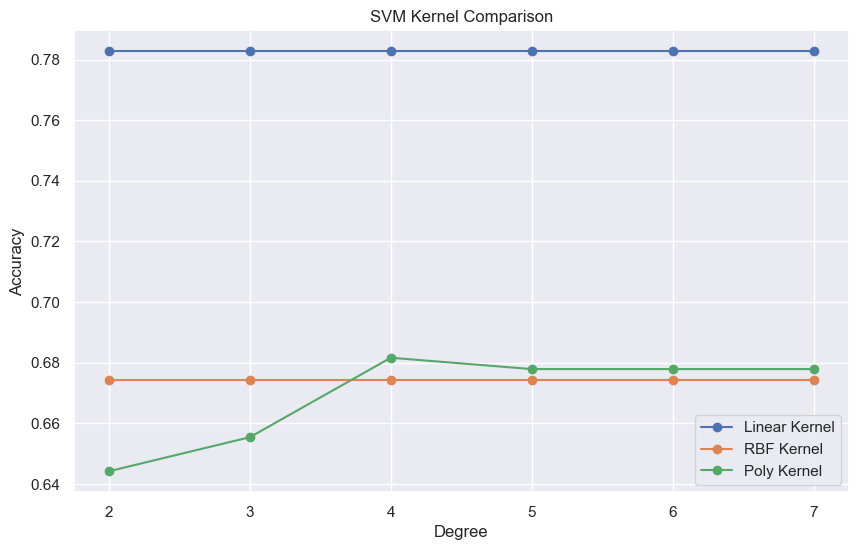

In [64]:
kernels = ['linear', 'rbf', 'poly']
degrees = list(range(2, 8))
accuracy_results_svm = []

for kernel in kernels:
    for degree in degrees:
        accuracy, _ = titanic_svm(kernel, degree, X_train, y_train, X_test, y_test)
        accuracy_results_svm.append((kernel, degree, accuracy))

linear_acc = [acc for kernel, degree, acc in accuracy_results_svm if kernel == 'linear']
rbf_acc = [acc for kernel, degree, acc in accuracy_results_svm if kernel == 'rbf']
poly_acc = [acc for kernel, degree, acc in accuracy_results_svm if kernel == 'poly']

plt.figure(figsize=(10, 6))
plt.plot(degrees, linear_acc, marker='o', label='Linear Kernel')
plt.plot(degrees, rbf_acc, marker='o', label='RBF Kernel')
plt.plot(degrees, poly_acc, marker='o', label='Poly Kernel')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.title('SVM Kernel Comparison')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()


El mejor modelo en cuanto accuracy para el Support Vector Machine resultó ser el de Kernel lineal. Este modelo tiene las siguientes métricas:

In [67]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

report = classification_report(y_test, prediction)
print("Informe de Clasificación:")
print(report)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       172
           1       0.72      0.63      0.67        95

    accuracy                           0.78       267
   macro avg       0.77      0.75      0.76       267
weighted avg       0.78      0.78      0.78       267



- **Accuracy (Precisión Global):** El modelo SVM tiene una precisión global del 78%, lo que significa que acertó correctamente la supervivencia o no supervivencia de los pasajeros en aproximadamente el 78% de las predicciones en el conjunto de prueba. Esto indica un rendimiento decente pero puede haber margen para mejoras.

- **Precision (Precisión):** La precisión para la clase 0 (no sobrevivientes) es del 81%, lo que indica que el 81% de las predicciones positivas para esta clase fueron correctas. La precisión para la clase 1 (sobrevivientes) es del 72%, lo que significa que el 72% de las predicciones positivas para esta clase fueron correctas. En general, el modelo tiene una precisión bastante equilibrada en ambas clases, aunque es ligeramente mejor en la clasificación de no sobrevivientes.

- **Recall (Recuperación o Sensibilidad):** El recall para la clase 0 (no sobrevivientes) es del 87%, lo que indica que el 87% de los verdaderos no sobrevivientes fueron identificados correctamente por el modelo. Para la clase 1 (sobrevivientes), el recall es del 63%, lo que significa que el 63% de los verdaderos sobrevivientes fueron identificados correctamente. Esto sugiere que el modelo es mejor para identificar no sobrevivientes que sobrevivientes.

- **F1-Score (Puntuación F1):** El F1-score es una medida que combina precisión y recall en una sola métrica. El F1-score para la clase 0 es 0.84 y para la clase 1 es 0.67. Un F1-score más alto indica un mejor equilibrio entre precisión y recall.

En resumen, el modelo SVM parece funcionar razonablemente bien en términos de accuracy, con un rendimiento ligeramente mejor en la clasificación de no sobrevivientes. Sin embargo, puede haber margen para mejorar la capacidad del modelo para identificar correctamente a los sobrevivientes.

### Gaussian Naive Bayes

El Gaussian Naive Bayes es un algoritmo que se basa en el teorema de Bayes y supone independencia entre características. Aunque simplista, puede ser útil en la clasificación del Titanic debido a su eficacia en datos con múltiples características categóricas. Su enfoque rápido y adecuado para conjuntos pequeños, junto con su capacidad para manejar relaciones simples entre características, lo convierte en una opción viable para la predicción de supervivencia en este contexto.

Se ajustará la variable `var_smoothing` que controla la suavización (smoothing) de las probabilidades de características. En Naive Bayes, la probabilidad de que una característica específica ocurra en una clase puede volverse cero si no se ha observado en el conjunto de entrenamiento. 

In [94]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

naive_bayes = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(0, -9, num=10)
}

grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_naive_bayes = grid_search.best_estimator_

y_pred = best_naive_bayes.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(confusion)

report = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(report)

accuracy = accuracy_score(y_test, y_pred)
print(f"(Accuracy): {accuracy:.2f}")

Matriz de Confusión:
[[150  22]
 [ 29  66]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       172
           1       0.75      0.69      0.72        95

    accuracy                           0.81       267
   macro avg       0.79      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267

(Accuracy): 0.81


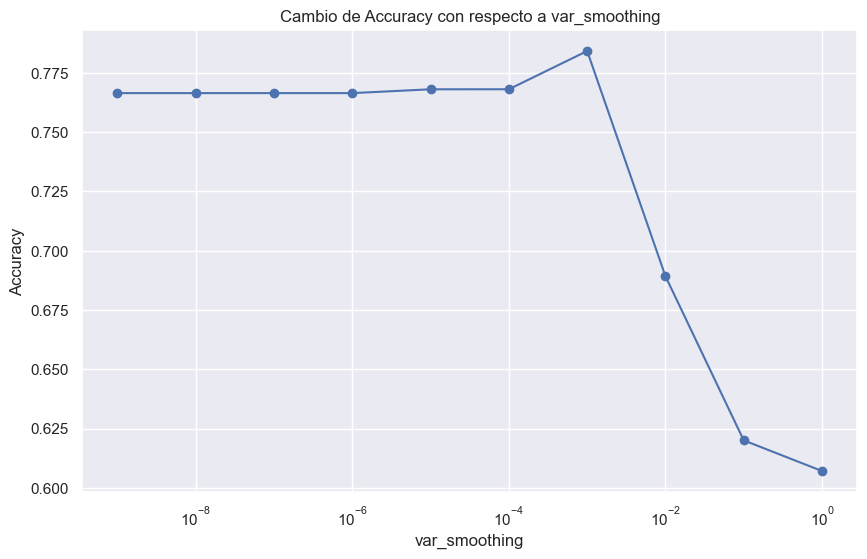

In [95]:
import matplotlib.pyplot as plt
var_smoothing_values = param_grid['var_smoothing']
accuracies = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.semilogx(var_smoothing_values, accuracies, marker='o')
plt.title('Cambio de Accuracy con respecto a var_smoothing')
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


- **Informe de Clasificación:**
  - Precision (Precisión) para la clase 0 (no sobrevivientes) es del 84%, lo que significa que el 83% de las predicciones positivas para esta clase fueron correctas. Para la clase 1 (sobrevivientes), la precisión es del 75%.
  - Recall (Recuperación o Sensibilidad) para la clase 0 es del 87%, lo que indica que el 90% de los verdaderos no sobrevivientes fueron identificados correctamente por el modelo. Para la clase 1, el recall es del 69%.
  - F1-Score (Puntuación F1) es de 0.85 para la clase 0 y 0.72 para la clase 1.
  - Accuracy: El modelo tiene una precisión global (accuracy) del 81%, lo que significa que aproximadamente el 81% de las predicciones son correctas en el conjunto de prueba (En la gráfica no llega a tocar ese punto ya que se visualiza el promedio del cross-fold validation, lo que provoca que pueda mostrarse menor o mayor dependiendo de los 5 test.)

En resumen, el modelo Naive Bayes tiene un rendimiento bastante sólido en la clasificación del conjunto de datos del Titanic, con una precisión global del 81%. El modelo es mejor para clasificar no sobrevivientes (clase 0) que sobrevivientes (clase 1), como se evidencia en un recall más alto para la clase 0. El F1-Score muestra un buen equilibrio entre precisión y recall para ambas clases.

### Logistic regression

La regresion logística lo que hace es meter una función linear como parametro dentro de una función sigmoide lo que la manda a un rango entre 0 y 1. Se variará `C` y `penalty`. **C (Inverse of Regularization Strength)** controla el nivel de regularización en el modelo. Un valor más bajo de `C` aumenta la regularización. **Penalty (Type of Regularization)** determina el tipo de regularización aplicada (L1 o L2). L1 tiende a conducir a la selección de características al hacer que algunos coeficientes sean exactamente cero, lo que puede ser útil para reducir la complejidad del modelo. L2 penaliza coeficientes grandes, evitando que tomen valores extremadamente altos.

In [96]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

param_grid = {
    'C': np.logspace(-3, 3, 5),  # Valores de C para regularización
    'penalty': ['l1', 'l2'],      # Tipo de regularización (L1 o L2)
}
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_logistic_regression = grid_search.best_estimator_
y_pred = best_logistic_regression.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confusion)

report = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(report)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy): {accuracy:.2f}")


Matriz de Confusión:
[[153  19]
 [ 31  64]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       172
           1       0.77      0.67      0.72        95

    accuracy                           0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267

Precisión (Accuracy): 0.81


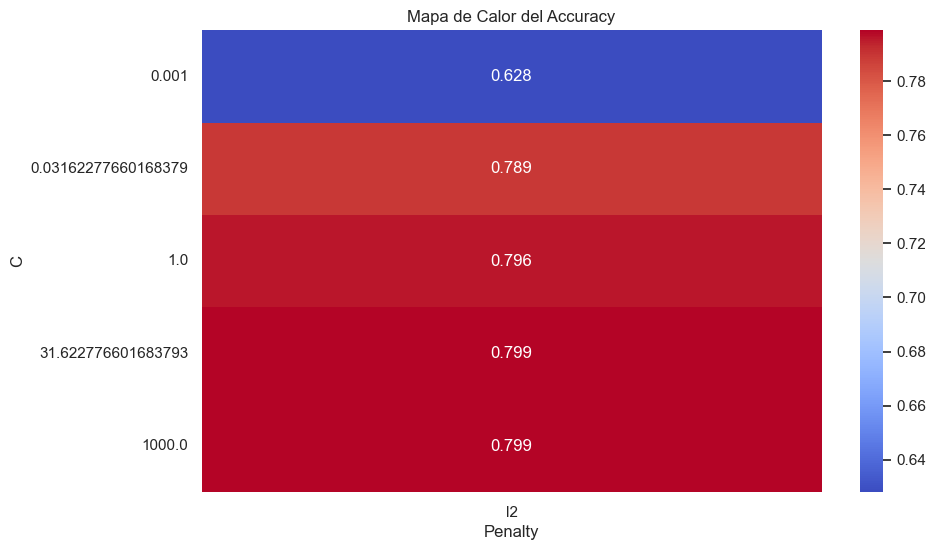

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

results_df = pd.DataFrame(grid_search.cv_results_)

accuracy_heatmap = results_df.pivot_table(values='mean_test_score', index='param_C', columns='param_penalty')

plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_heatmap, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Mapa de Calor del Accuracy')
plt.xlabel('Penalty')
plt.ylabel('C')
plt.show()

- **Informe de Clasificación:**
  - Precision (Precisión) para la clase 0 (no sobrevivientes) es del 83%, lo que significa que el 77% de las predicciones positivas para esta clase fueron correctas. Para la clase 1 (sobrevivientes), la precisión es del 81%.
  - Recall (Recuperación o Sensibilidad) para la clase 0 es del 89%, lo que indica que el 67% de los verdaderos no sobrevivientes fueron identificados correctamente por el modelo. Para la clase 1, el recall es del 68%.
  - F1-Score (Puntuación F1) es de 0.86 para la clase 0 y 0.72 para la clase 1.
  - Accuracy: El modelo tiene una precisión global (accuracy) del 81%, lo que significa que aproximadamente el 81% de las predicciones son correctas en el conjunto de prueba. (En la gráfica no llega a tocar ese punto ya que se visualiza el promedio del cross-fold validation, lo que provoca que pueda mostrarse menor o mayor dependiendo de los 5 test pero el reporte y la matriz de confución lo demuestran.)

En resumen, el modelo de Regresión Logística con los hiperparámetros optimizados muestra un rendimiento sólido en la clasificación del conjunto de datos del Titanic, con una precisión global del 81%. Al igual que el modelo Naive Bayes, este modelo es mejor para clasificar no sobrevivientes (clase 0) que sobrevivientes (clase 1), como se evidencia en un recall más alto para la clase 0. El F1-Score muestra un buen equilibrio entre precisión y recall para ambas clases.

El mapa de calor mostraría cómo cambia el accuracy en función de las diferentes combinaciones de los hiperparámetros `C` y `penalty`. Sin embargo, el modelo tiene problemas usando L1, por lo que únicamente se pudo ejecutar regresión logistica con penalización L2.

### Random forest

Para el modelo Random Forest variaremos el límite de profundidad de los árboles:

1. **None (Sin límite)**: Al incluir `None`, permitimos que los árboles en el bosque crezcan hasta su máxima profundidad, lo que significa que pueden ser muy profundos y complejos. Esta opción permitirá que el modelo capture detalles finos en los datos, pero también puede llevar al sobreajuste si no se controla adecuadamente.

2. **10, 20, 30, 40, 50**: Estos valores representan límites máximos de profundidad para los árboles. Comenzamos con valores más bajos (10) y aumentamos gradualmente en incrementos de 10 hasta 50. Esto permite explorar diferentes niveles de complejidad del modelo. Los valores más bajos tienden a crear modelos más simples y menos propensos al sobreajuste, mientras que los valores más altos pueden dar como resultado modelos más complejos.

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(random_state=0,)
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50]  # Valores de max_depth para probar
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_random_forest = grid_search.best_estimator_

y_pred = best_random_forest.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confusion)

report = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(report)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy): {accuracy:.2f}")

Matriz de Confusión:
[[154  18]
 [ 27  68]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       172
           1       0.79      0.72      0.75        95

    accuracy                           0.83       267
   macro avg       0.82      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267

Precisión (Accuracy): 0.83


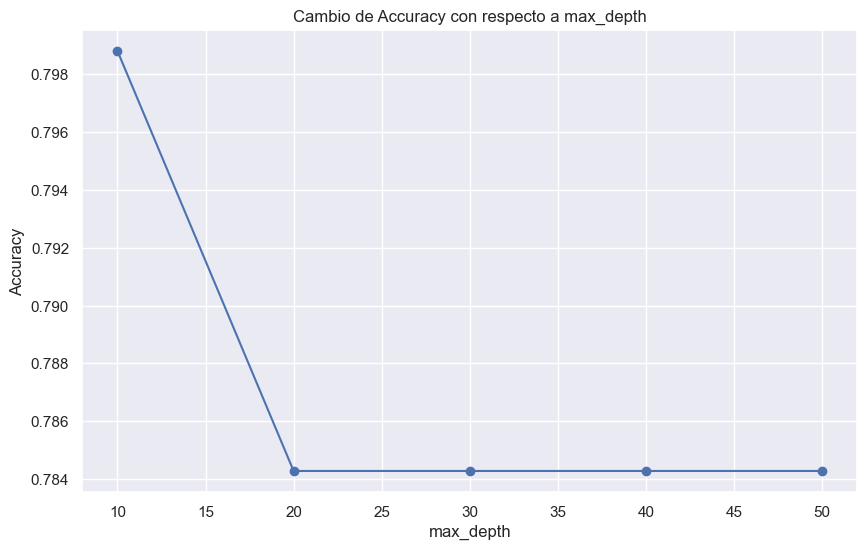

In [101]:
max_depth_values = param_grid['max_depth']
accuracies = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, accuracies, marker='o')
plt.title('Cambio de Accuracy con respecto a max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Los resultados del modelo Random Forest después de la búsqueda de cuadrícula son los siguientes:

- **Informe de Clasificación:**
  - Precision (Precisión) para la clase 0 (no sobrevivientes) es del 85%, lo que significa que el 85% de las predicciones positivas para esta clase fueron correctas. Para la clase 1 (sobrevivientes), la precisión es del 79%.
  - Recall (Recuperación o Sensibilidad) para la clase 0 es del 90%, lo que indica que el 90% de los verdaderos no sobrevivientes fueron identificados correctamente por el modelo. Para la clase 1, el recall es del 72%.
  - F1-Score (Puntuación F1) es de 0.87 para la clase 0 y 0.75 para la clase 1.
  - Accuracy: El modelo tiene una precisión global (accuracy) del 83%, lo que significa que aproximadamente el 83% de las predicciones son correctas en el conjunto de prueba.

En resumen, el modelo Random Forest con el mejor valor de `max_depth` encontrado en la búsqueda de cuadrícula muestra un rendimiento sólido en la clasificación del conjunto de datos del Titanic, con una precisión global del 83%. Al igual que los modelos anteriores, este modelo también es mejor para clasificar no sobrevivientes (clase 0) que sobrevivientes (clase 1), como se evidencia en un recall más alto para la clase 0. El F1-Score muestra un buen equilibrio entre precisión y recall para ambas clases.


In [102]:
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:")
print(best_params)

Mejores parámetros encontrados:
{'max_depth': 10}


## Comparativa de Modelos

**Support Vector Machine (SVM):**
- Accuracy: 0.78
- F1-Score (clase 0/clase 1): 0.84 / 0.67

**Naive Bayes:**
- Accuracy: 0.81
- F1-Score (clase 0/clase 1): 0.85 / 0.72

**Logistic Regression:**
- Accuracy: 0.81
- F1-Score (clase 0/clase 1): 0.86 / 0.72

**Random Forest:**
- Accuracy: 0.83
- F1-Score (clase 0/clase 1): 0.87 / 0.75

**Explicación:**

1. **Accuracy**: Observamos que Random Forest tiene la mayor precisión global (83%), lo que indica que es el modelo que acierta más predicciones en el conjunto de prueba en comparación con los otros modelos.

2. **F1-Score (clase 0/clase 1)**: El F1-Score es una métrica que combina precisión y recall. Random Forest tiene un F1-Score ligeramente superior para la clase 1 (sobrevivientes) en comparación con los otros modelos, lo que sugiere que es mejor para identificar correctamente a los sobrevivientes.

3. **Max Depth = 10**: Aunque el Random Forest con `max_depth` de 10 tiene un rendimiento ligeramente menor en términos de precisión en comparación con el Random Forest sin límite de profundidad (`max_depth=None`), es importante considerar que un modelo con una profundidad limitada generaliza mejor y es menos propenso al sobreajuste. Esto es especialmente importante en aplicaciones del mundo real donde se busca un buen equilibrio entre precisión y capacidad de generalización.

En resumen, se selecciona el modelo Random Forest con `max_depth=10` porque tiene una precisión global sólida y un F1-Score equilibrado para ambas clases, lo que sugiere un buen equilibrio entre precisión y capacidad de generalización. Además, la limitación de la profundidad del árbol ayuda a reducir el riesgo de sobreajuste.

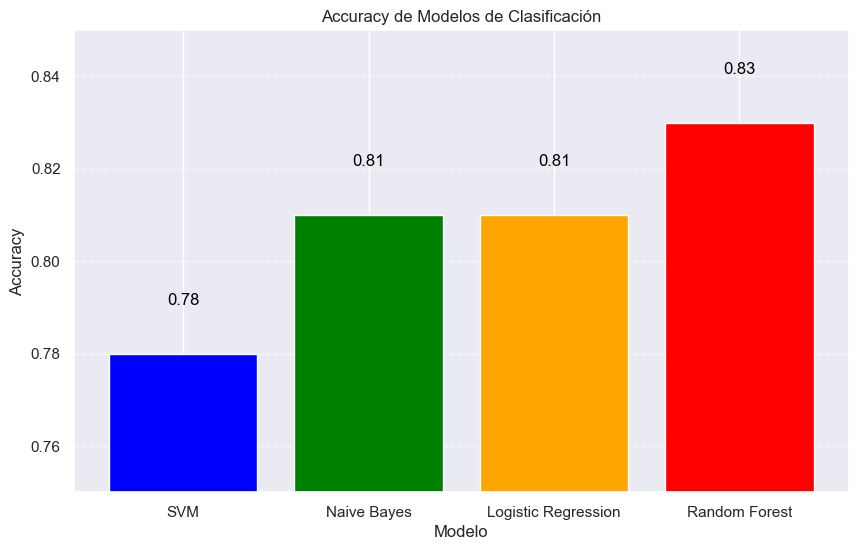

In [103]:
import matplotlib.pyplot as plt
model_names = ['SVM', 'Naive Bayes', 'Logistic Regression', 'Random Forest']
accuracies = [0.78, 0.81, 0.81, 0.83]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0.75, 0.85)
plt.title('Accuracy de Modelos de Clasificación')
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()


# Parte 3: Evaluación y Refinamiento del modelo

Después de evaluar y comparar varios modelos de clasificación, entre ellos Support Vector Machine (SVM), Naive Bayes, Logistic Regression y Random Forest. Tras esta comparativa, seleccionamos el modelo Random Forest con una profundidad máxima de 10 como nuestra elección principal debido a su rendimiento superior en términos de accuracy y capacidad de generalización en relación a los demás modelos. 

En esta siguiente sección, nos enfocaremos en la Evaluación y Refinamiento del Modelo Random Forest. A pesar de haber identificado un modelo prometedor, aún hay margen para mejorar su rendimiento mediante la exploración de más parámetros y la aplicación de técnicas de regularización. Exploraremos la afinación de hiperparámetros adicionales, la búsqueda de la mejor configuración y la evaluación de su impacto en las métricas de rendimiento. Con esto, nuestro objetivo es garantizar que nuestro modelo sea lo más preciso y generalizado posible para la tarea de predicción de supervivencia en el desafío del Titanic.

## El detalle de la regularización en random forest

El modelo Random Forest no utiliza regularización de la misma manera que algunos otros modelos, como la Regresión Logística o las Máquinas de Vectores de Soporte (SVM). En cambio, el Random Forest controla el sobreajuste (overfitting) de manera inherente a través de su estructura de conjunto de árboles de decisión. Cada árbol en el conjunto se construye de manera independiente, y el proceso de combinación de los resultados de estos árboles tiende a reducir el sobreajuste de manera automática.

Hay algunas técnicas que se pueden considerar para '*regularizar*' un modelo Random Forest:

1. **Limitar la Profundidad de los Árboles**: Esto se logra ajustando el hiperparámetro `max_depth` o `max_leaf_nodes`. Reducir la profundidad máxima de los árboles puede ayudar a prevenir el sobreajuste y hacer que el modelo sea más generalizado.

2. **Aumentar el Número de Árboles**: Agregar más árboles al conjunto (a través del hiperparámetro `n_estimators`) puede ayudar a mejorar la generalización del modelo. Sin embargo, esto también puede aumentar el tiempo de entrenamiento.

3. **Submuestreo de Características (Feature Sampling)**: El Random Forest permite submuestrear las características en cada árbol (a través del hiperparámetro `max_features`). Reducir la cantidad de características consideradas en cada árbol puede ayudar a evitar el sobreajuste.

4. **Bootstrap Aggregating (Bagging)**: El Random Forest utiliza un enfoque de bagging al entrenar sus árboles. Esto implica tomar muestras aleatorias con reemplazo de los datos de entrenamiento para entrenar cada árbol. Esta técnica reduce la varianza y puede ayudar a prevenir el sobreajuste.

5. **Out-of-Bag (OOB) Score**: El Random Forest proporciona una métrica de evaluación llamada "out-of-bag score". Esta métrica se basa en las muestras de entrenamiento que no se utilizaron para entrenar cada árbol. Puede servir como una medida de validación cruzada interna para evaluar el rendimiento y la generalización del modelo.

Aunque el Random Forest no utiliza regularización en el sentido tradicional, se puede ajustar sus hiperparámetros y considerar técnicas específicas para controlar el sobreajuste y mejorar su capacidad de generalización.

## Optimizacion de hiperparámetros

Para refinar el modelo de random forest con max depth = 10 ya seleccionado anteriormente, procederemos a hacer una busqueda ajustando los valores para `n_estimators` y `max_features` en Random Forest. Estos hiperparámetros son importantes porque tienen un impacto significativo en el rendimiento y la capacidad de generalización del modelo.

1. **`n_estimators` (Número de Árboles en el Bosque)**:
   - **Subajuste vs. Sobreajuste**: El número de árboles en el bosque, controlado por `n_estimators`, es un hiperparámetro crítico. Un número pequeño de árboles puede llevar al subajuste, lo que significa que el modelo no captura adecuadamente los patrones en los datos. Por otro lado, un número excesivamente grande de árboles puede aumentar el tiempo de entrenamiento sin mejorar significativamente la generalización. La optimización de este hiperparámetro nos ayuda a encontrar un equilibrio adecuado.

2. **`max_features` (Submuestreo de Características)**:
   - **Reducción de la Correlación entre Árboles**: `max_features` controla la cantidad de características consideradas en cada división de un nodo. Al ajustar este hiperparámetro, podemos reducir la correlación entre los árboles del bosque. Esto es importante porque reduce la varianza del modelo y ayuda a prevenir el sobreajuste. Submuestrear las características a menudo mejora la capacidad de generalización.

La optimización de estos hiperparámetros nos permite encontrar la combinación óptima que equilibra el sesgo y la varianza, lo que resulta en un modelo Random Forest que puede hacer predicciones precisas en nuevos datos no vistos.

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Modelo Random Forest con max_depth fijo en 10
random_forest = RandomForestClassifier(max_depth=10, random_state=0)

param_grid = {
    'n_estimators': [50, 100, 150],      # Número de árboles en el bosque
    'max_features': ['sqrt', 'log2', None]  # Submuestreo de características
}
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_random_forest = grid_search.best_estimator_
y_pred = best_random_forest.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confusion)

report = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(report)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy): {accuracy:.2f}")


Matriz de Confusión:
[[155  17]
 [ 27  68]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       172
           1       0.80      0.72      0.76        95

    accuracy                           0.84       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.84      0.83       267

Precisión (Accuracy): 0.84


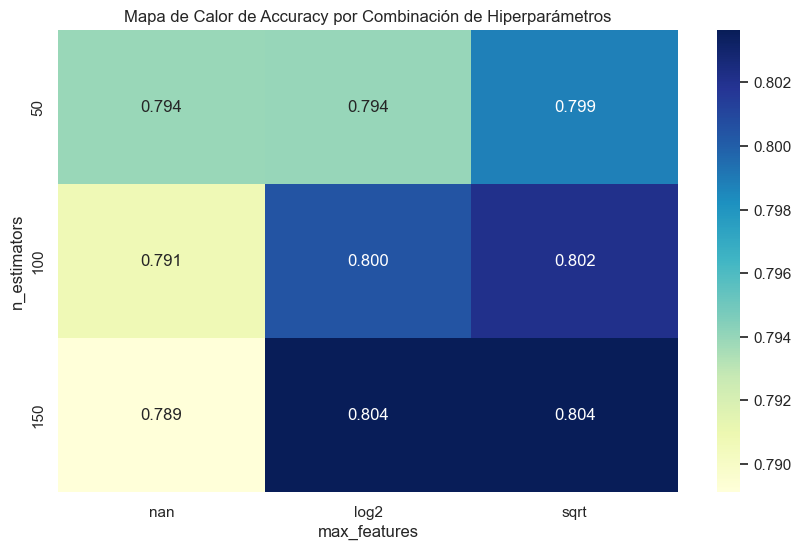

In [105]:
results = pd.DataFrame(grid_search.cv_results_)

pivot_table = results.pivot(index='param_n_estimators', columns='param_max_features', values='mean_test_score')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True)
plt.title('Mapa de Calor de Accuracy por Combinación de Hiperparámetros')
plt.xlabel('max_features')
plt.ylabel('n_estimators')
plt.show()

In [106]:
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:")
print(best_params)

Mejores parámetros encontrados:
{'max_features': 'sqrt', 'n_estimators': 150}


- El modelo Random Forest con los mejores hiperparámetros (`max_features='sqrt'` y `n_estimators=150`) logra un accuracy del 84%, lo que significa que aproximadamente el 84% de las predicciones fueron correctas en el conjunto de prueba.

- La matriz de confusión muestra que el modelo hizo 155 predicciones correctas para la clase 0 (no sobrevivientes) y 68 predicciones correctas para la clase 1 (sobrevivientes). Cometió 17 falsos positivos y 27 falsos negativos.

- En cuanto al informe de clasificación, el modelo tiene una precisión promedio del 83%, lo que indica un buen rendimiento general. La puntuación F1 es del 88% para la clase 0 y del 76% para la clase 1.

- Los mejores parámetros encontrados durante la optimización fueron `max_features='sqrt'` y `n_estimators=150`. Esto significa que el modelo utiliza la raíz cuadrada del número de características para cada división de nodo y consta de 150 árboles en el bosque.

En resumen, el modelo Random Forest con estos hiperparámetros ajustados logra un buen rendimiento en la tarea de predicción de supervivencia en el dataset del Titanic, con un buen equilibrio entre precisión y capacidad de generalización.

### Sesgo y Varianza

- **Accuracy (Precisión):** El modelo tiene un accuracy del 84%, lo que indica que la mayoría de las predicciones son correctas en el conjunto de prueba. Sin embargo, el accuracy por sí solo no nos dice si hay sesgo o varianza.

- **Matriz de Confusión:** La matriz de confusión muestra que el modelo cometió 17 falsos positivos y 27 falsos negativos. Esto sugiere que el modelo no es perfecto y tiene algunas confusiones, pero no parece haber un desequilibrio extremo.

- **Informe de Clasificación:** El informe de clasificación proporciona métricas adicionales. El recall (sensibilidad) para la clase 1 (sobrevivientes) es del 72%. Esto significa que el modelo identifica correctamente alrededor del 72% de los verdaderos sobrevivientes en el conjunto de prueba. Un recall relativamente menor podría indicar cierto sesgo hacia la clase mayoritaria (en este caso, la clase 0, que representa a los no sobrevivientes).

Basándonos en estos resultados, podemos hacer el siguiente diagnóstico:

1. **Sesgo (Underfitting):** El modelo no parece estar sufriendo de underfitting, ya que logra un buen accuracy general y no se observa un rendimiento extremadamente pobre en ninguna métrica. Sin embargo, el recall relativamente bajo para la clase 1 sugiere que el modelo podría estar perdiendo algunos casos de verdaderos sobrevivientes, lo que podría indicar un ligero sesgo hacia la clase mayoritaria.

2. **Varianza (Overfitting):** No parece haber evidencia clara de overfitting en este modelo. El hecho de que el modelo tenga un buen rendimiento en el conjunto de prueba y no muestre una gran discrepancia entre el rendimiento en el conjunto de entrenamiento y prueba sugiere que no hay una varianza excesiva.

En resumen, el modelo Random Forest parece tener un buen equilibrio entre sesgo y varianza, con un rendimiento general sólido en la tarea de predicción de supervivencia en el dataset del Titanic. El recall ligeramente menor en la clase 1 podría ser mejorado con ajustes adicionales, pero en general, no parece haber un problema significativo de sesgo o varianza en este caso.

# Interfaz

Con el modelo de Random Forest entrenado y con un rendimiento satisfactorio, se procedió a su serialización para guardarlo en caché de Streamlit. Luego, se creó una interfaz web en Streamlit que permite a los usuarios ingresar datos de un pasajero del Titanic y obtener una predicción de supervivencia en tiempo real utilizando el modelo entrenado. Los usuarios pueden seleccionar la clase, edad, cantidad de hermanos o cónyuges, cantidad de padres o hijos, costo del boleto, puerto de embarque y sexo del pasajero, y el modelo proporcionará una predicción de supervivencia. El código está hosteado por la disponibilidad de cómputo en la nube de streamlit lo cual nos permite generar un link al cual podemos entrar desde cualquier navegador [Click Aquí para probar interfaz](https://retotitanicclaseia.streamlit.app/).